<a href="https://colab.research.google.com/github/RaeHickel/DeeplearningAssign/blob/main/DeepLearning_Assignment_Raghda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


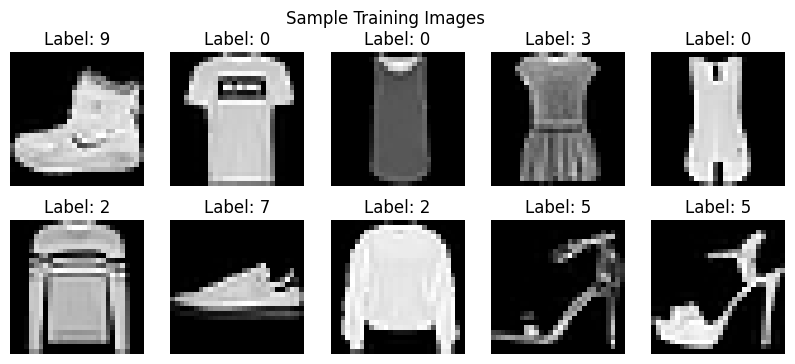

In [14]:
# Show some training samples
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Training Images")
plt.show()

In [15]:
# Normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape for dense layers (flatten images)
X_train_flat = X_train.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

print("Flattened training data shape:", X_train_flat.shape)

Flattened training data shape: (60000, 784)


In [16]:
# Basic Sequential model
model = keras.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile with SGD optimizer
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Train the model and save history
history = model.fit(
    X_train_flat, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6653 - loss: 1.0484 - val_accuracy: 0.8077 - val_loss: 0.5717
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8148 - loss: 0.5505 - val_accuracy: 0.8208 - val_loss: 0.5118
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8383 - loss: 0.4845 - val_accuracy: 0.8318 - val_loss: 0.4777
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8414 - loss: 0.4605 - val_accuracy: 0.8407 - val_loss: 0.4527
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8456 - loss: 0.4424 - val_accuracy: 0.8436 - val_loss: 0.4376
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8546 - loss: 0.4244 - val_accuracy: 0.8492 - val_loss: 0.4350
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8565 - loss: 0.4156 - val_accuracy: 0.8551 - val_loss: 0.4169
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8611 - loss: 0.4035 - 

Somehow running the cell three times meant it continued with the same accuracy & loss from the last epoch of the last iteration

In [18]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_flat, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.1099 - loss: 2.3297
Test accuracy: 0.1099
Test loss: 2.3297
